# 6 УРОК ОКОННЫЕ ФУНКЦИИ И ИНТЕРАКТИВНЫЕ ГРАФИКИ

## Минипроект

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней.
И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

Задачи
Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и 
среднее количество кликов на объявления за весь период (округлите до целых).
Нарисуйте график распределения показов на объявление за весь период.
Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года 
(ответ округлите до целых)?
Скользящее среднее часто используется для поиска аномалий в данных. 
Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. 
В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
Дни, в которых скользящее среднее равно NaN, не учитываем. 
*Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день,
в который была замечена самая большая по модулю аномалия. 
Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и 
первым запуском рекламного объявления этим клиентом.
Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))
Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]
А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.
Описание данных
ads_data.csv – данные взаимодействий с рекламными объявлениями

date – дата
time – время
event – действие (просмотр/клик)
platform – платформа
ad_id – id объявления
client_union_id – id рекламного кабинета
campaign_union_id – id рекламной кампании
ad_cost_type – тип оплаты
ad_cost – цена
has_video – есть ли видео
target_audience_count – размер аудитории
ads_clients_data.csv – характеристики рекламных клиентов

date – дата
client_union_id – id рекламного кабинета
community_id – id сообщества
create_date – дата создания рекламного клиента
Данные находятся на JupyterHub, можно скачать архив

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [4]:
path_to_file_1 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/6/ads_data.csv'

In [8]:
path_to_file_2 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv'

In [108]:
ads_data_df = pd.read_csv(path_to_file_1, parse_dates=['date','time'])

In [109]:
ads_clients_data_df = pd.read_csv(path_to_file_2, parse_dates=['date','create_date'])

In [10]:
ads_data_df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [11]:
ads_data_df.shape

(1000000, 11)

In [10]:
ads_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   date                   1000000 non-null  datetime64[ns]
 1   time                   1000000 non-null  datetime64[ns]
 2   event                  1000000 non-null  object        
 3   platform               1000000 non-null  object        
 4   ad_id                  1000000 non-null  int64         
 5   client_union_id        1000000 non-null  int64         
 6   campaign_union_id      1000000 non-null  int64         
 7   ad_cost_type           1000000 non-null  object        
 8   ad_cost                1000000 non-null  float64       
 9   has_video              1000000 non-null  int64         
 10  target_audience_count  1000000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 83.9+ MB


In [12]:
ads_clients_data_df.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [30]:
ads_clients_data_df.shape

(122078, 4)

In [12]:
ads_clients_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122078 entries, 0 to 122077
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             122078 non-null  datetime64[ns]
 1   client_union_id  122078 non-null  int64         
 2   community_id     122078 non-null  int64         
 3   create_date      122078 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.7 MB


Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. 
Тонкий момент: помните, что некоторые показываемые объявления не кликались,
и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. 
Округлите ответы до целых чисел.

Могут понадобиться:

pivot()
fillna()

In [ ]:
- **План решения задания**
    
    В этом задании мы считаем среднее число кликов и показов по всем рекламным объявлениям. 
    
    Это можно сделать следующим образом - сгруппировать данные по объявлению (`ad_id`) и событию (`event`) 
    и посчитать число событий для каждого объявления в каждом типе. 
    
    Далее можно сделать сводную табличку по всем типам событий и всем рекламам, заменить NA на 0, 
    посчитать среднее и округлить. 
    
    Либо можно сгруппировать по типу события, посчитать сумму, разделить на число всех реклам и округлить

In [15]:
ads_data_df.groupby(['ad_id' , 'event'], as_index = False).size()

,ad_id,event,size
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [16]:
ads_data_df.groupby(['ad_id' , 'event'], as_index = False).agg({'time' : 'count'})


,ad_id,event,time
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [17]:
ad_id_event = ads_data_df.groupby(['ad_id' , 'event'], as_index = False).size()


In [18]:
ad_id_event.describe()

,ad_id,size
count,1481.000000,1481.000000
mean,57558.546928,675.219446
std,38666.841403,10808.472225
min,2.000000,1.000000
25%,29768.000000,4.000000
50%,43086.000000,35.000000
75%,107081.000000,122.000000
max,122078.000000,351802.000000


In [19]:
ad_id_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ad_id   1481 non-null   int64 
 1   event   1481 non-null   object
 2   size    1481 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.8+ KB


In [18]:
ad_id_event

,ad_id,event,size
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [19]:
# ЭТО Я САМ ))
ad_id_event.pivot(index='ad_id', columns='event', values='size').reset_index().fillna(0).mean().round()

event
ad_id    57971.0
click      113.0
view       923.0
dtype: float64

In [20]:
# ЭТО ПОДГЛЯДЕЛ ....
(
ads_data_df
        .groupby(['ad_id', 'event'])
        .size()
        .unstack()
        .fillna(0)
        .mean()
        .round()
        )

event
click    113.0
view     923.0
dtype: float64

Среднее количество кликов на объявление 113. Среднее количество показов на объявление 923.

In [20]:
ad_id_event_view = ad_id_event.pivot(index='ad_id', columns='event', values='size').reset_index().fillna(0)

In [71]:
ad_id_event_view

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [21]:
ad_id_event_view.view

0      101.0
1      184.0
2       41.0
3       35.0
4       58.0
       ...  
960    100.0
961    156.0
962     68.0
963    138.0
964     42.0
Name: view, Length: 965, dtype: float64

Давайте посмотрим на распределение показов объявлений!

По оси x – число показов
По оси y – доля объявлений с такими показами
Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. 
Выберите соответствующий график:



Для такого же отображения используйте эти настройки

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )


Могут пригодиться:

sns.distplot
np.log

- **Как решать это задание?**
    
    Возьмите из прошлого задания сгруппированный по типу события и объявлению датафрэйм, 
    где подсчитано число строк для каждой группы (то есть число таких событий для определённой рекламы
    
    Отберите только показы, прологарифмируйте их с помощью `np.log` и постройте график распределения
    
- **Логарифмирование**
    
    В пандасе нет функции логарифмирования, но она есть в библиотеке `numpy`. Поэтому код
    
    ```python
    import numpy as np
    
    np.log(df.column1)
    ```
    
    Вернёт колонку `column1` с логарифмом исходных значений
    
- **Как визуализировать распределение?**
    
    Используйте функцию `sns.distplot`, которая принимает серию (колонку датафрэйма). К примеру,
    
    ```python
    sns.distplot(df.column1)
    ```
    
    Нарисует распределение значений из колонки `column1`

In [22]:
# itsn't
ads_data_df.query("event == 'view'").groupby('ad_id').event.count()

ad_id
2         101
3         184
1902       41
2064       35
2132       58
         ... 
122004    100
122013    156
122023     68
122031    138
122078     42
Name: event, Length: 956, dtype: int64

In [23]:

np.log(ads_data_df.query("event == 'view'").groupby('ad_id').event.count())

ad_id
2         4.615121
3         5.214936
1902      3.713572
2064      3.555348
2132      4.060443
            ...   
122004    4.605170
122013    5.049856
122023    4.219508
122031    4.927254
122078    3.737670
Name: event, Length: 956, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


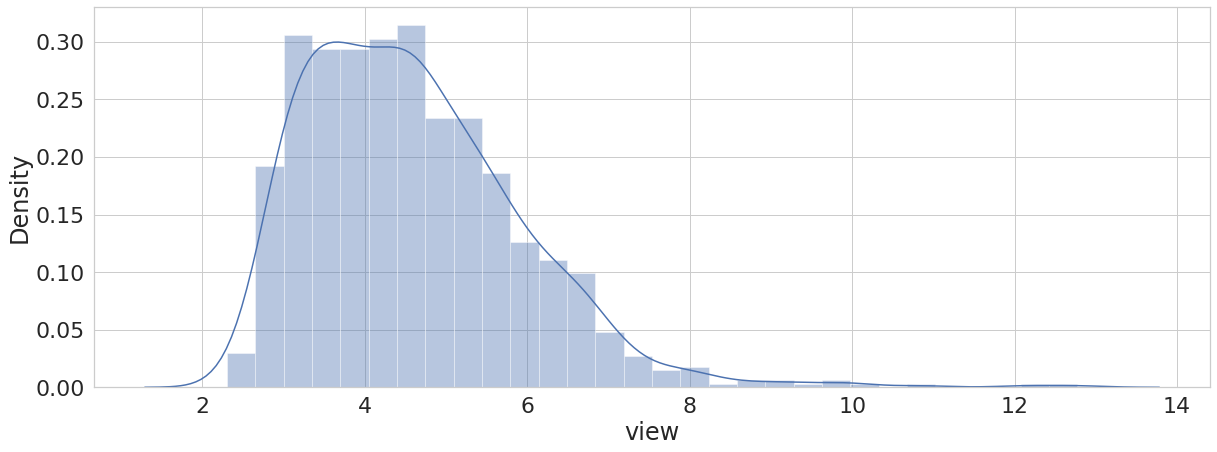

In [29]:
data = np.log(ads_data_df
                  .query("event == 'view'")
                  .groupby('ad_id')
                  .event
                  .count())
data.name = 'view'
sns.distplot(data)

In [27]:
#  It's me
ads_data_df.query("event == 'view'").groupby('ad_id', as_index = False).agg({'time' : 'count'})


,ad_id,time
0,2,101
1,3,184
2,1902,41
3,2064,35
4,2132,58
...,...,...
951,122004,100
952,122013,156
953,122023,68
954,122031,138


In [73]:
#  It's me
np.log(ads_data_df.query("event == 'view'").groupby('ad_id', as_index = False).agg({'time' : 'count'})).rename(columns={'time':'count_view'})

,ad_id,count_view
0,0.693147,4.615121
1,1.098612,5.214936
2,7.550661,3.713572
3,7.632401,3.555348
4,7.664816,4.060443
...,...,...
951,11.711809,4.605170
952,11.711883,5.049856
953,11.711965,4.219508
954,11.712030,4.927254


In [32]:
data_log = np.log(ads_data_df.query("event == 'view'").groupby('ad_id', as_index = False).agg({'time' : 'count'})).rename(columns={'time':'count_view'})

In [31]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


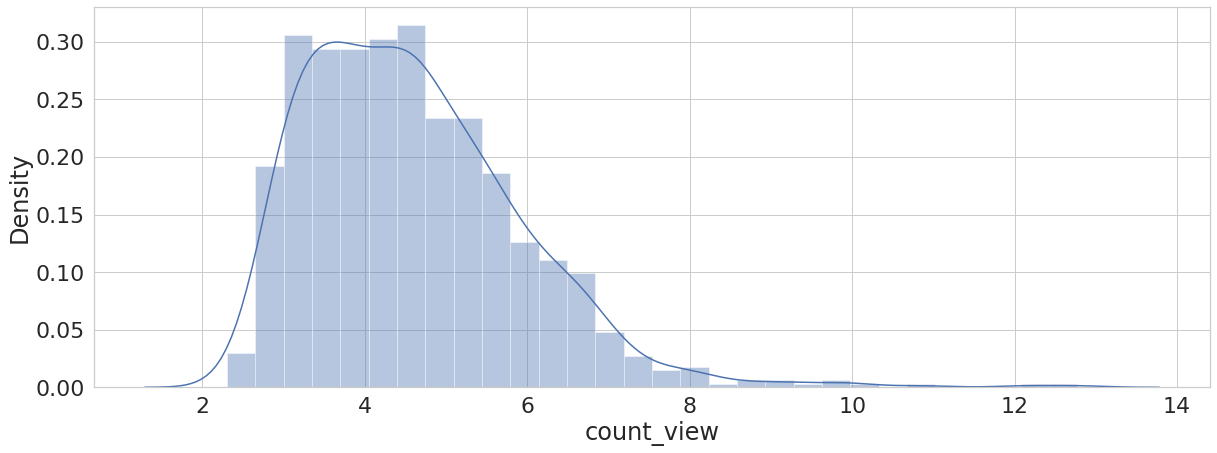

In [33]:
sns.distplot(data_log.count_view)

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления,
у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату
с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

Могут пригодиться:

pivot()
скользящее среднее
Подсказки

In [34]:
ads_data_df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


- **Как решать это задание?**
    
    Здесь не нужно исхитряться как в 1-ом задании, так как нам не нужно учитывать объявления, у которых не было просмотров. 
    
    Отберите только просмотры, сгруппируйте данные по объявлениям и дням и посчитайте число просмотров для каждого объявления 
    (`ad_id`) в каждый день (`date`). 
    
    После этого произведите группировку по дням и посчитайте среднее число просмотров для каждого дня. 
    Потом посчитайте скользящее среднее с помощью `rolling`
    
- **Как посчитать скользящее среднее?**
    
    Для этого примените метод rolling c желаемым размером окна к колонке, от которой вы хотите его получить. 
    После его вызова примените метод mean. Например,
    
    ```python
    df.column1.rolling(10).mean()
    ```
    
    Посчитает скользящее среднее от колонки `column1` с окном `10`

In [97]:
ads_data_df.query("event == 'view'").groupby(['date', 'ad_id'],as_index = False).size()

,date,ad_id,size
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17
...,...,...,...
1926,2019-04-06,119161,14
1927,2019-04-06,119175,27
1928,2019-04-06,121309,111
1929,2019-04-06,121820,11


In [101]:
ads_data_df_mean = ads_data_df.query("event == 'view'").groupby(['date', 'ad_id'],as_index = False).size()

In [102]:
ads_data_df_mean

,date,ad_id,size
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17
...,...,...,...
1926,2019-04-06,119161,14
1927,2019-04-06,119175,27
1928,2019-04-06,121309,111
1929,2019-04-06,121820,11


In [114]:
type(ads_data_df_mean)

pandas.core.frame.DataFrame

In [103]:
ads_data_df.query("event == 'view'")\
            .groupby(['date', 'ad_id'],as_index = False)\
            .size()\
            .groupby('date', as_index = False)\
            .mean()\
            .round()

,date,ad_id,size
0,2019-04-01,59138.0,154.0
1,2019-04-02,58431.0,138.0
2,2019-04-03,61183.0,164.0
3,2019-04-04,59279.0,676.0
4,2019-04-05,54709.0,919.0
5,2019-04-06,54640.0,277.0


In [109]:
ads_data_mean = ads_data_df.query("event == 'view'")\
            .groupby(['ad_id','date'])\
            .size()\
            .groupby('date')\
            .mean()\
            .round()

In [110]:
ads_data_mean

date
2019-04-01    154.0
2019-04-02    138.0
2019-04-03    164.0
2019-04-04    676.0
2019-04-05    919.0
2019-04-06    277.0
dtype: float64

In [35]:
ads_data_mean_rolling = ads_data_df.query("event == 'view'")\
            .groupby(['ad_id','date'])\
            .size()\
            .groupby('date')\
            .mean()\
            .round()\
            .rolling(2).mean()

In [36]:
ads_data_mean_rolling

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    797.5
2019-04-06    598.0
dtype: float64

In [113]:
type(ads_data_mean_rolling)

pandas.core.series.Series

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения
просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

Пример ответа:

2020-12-31


Могут пригодиться:

sns.lineplot()
скользящее среднее
значение по модулю

In [ ]:
- **Как решать это задание?**
    
    Нарисуйте на одном графике среднее и скользящее среднее числа просмотров рекламы по дням, 
    полученные вами в предыдущем задании. 
    
    Для получения дня с наибольшей дельтой вычтите из одной колонки другую, примените метод `abs`
    и возьмите максимальное значение
    
- **Как визуализировать 2 графика на одной картинке?**
    
    Просто напишите 2 вызова рисовательных функций на нужных данных в одной ячейке ноутбука. Например,
    
    ```python
    sns.distplot(df.column1)
    sns.distplot(df.column2)
    ```
    
    Нарисует распределения значений из колонок `column1` и `column2`

In [39]:
ads_data_df.query("event == 'view'")\
            .groupby(['date', 'ad_id'],as_index = False)\
            .size()\
            .groupby('date', as_index = False)\
            .mean()\
            .round()

,date,ad_id,size
0,2019-04-01,59138.0,154.0
1,2019-04-02,58431.0,138.0
2,2019-04-03,61183.0,164.0
3,2019-04-04,59279.0,676.0
4,2019-04-05,54709.0,919.0
5,2019-04-06,54640.0,277.0


In [64]:
ads_data_df_mean = ads_data_df.query("event == 'view'")\
            .groupby(['date', 'ad_id'], as_index = False)\
            .size()\
            .groupby('date', as_index = False)\
            .mean()\
            .round()

In [85]:
ads_data_mean_rolling_2 = ads_data_df.query("event == 'view'")\
            .groupby(['ad_id','date'], as_index = False)\
            .size()\
            .groupby('date')\
            .mean()\
            .round()\
            .rolling(2).mean().reset_index()

In [86]:
ads_data_mean_rolling_2

,date,ad_id,size
0,2019-04-01,NaN,NaN
1,2019-04-02,58784.5,146.0
2,2019-04-03,59807.0,151.0
3,2019-04-04,60231.0,420.0
4,2019-04-05,56994.0,797.5
5,2019-04-06,54674.5,598.0


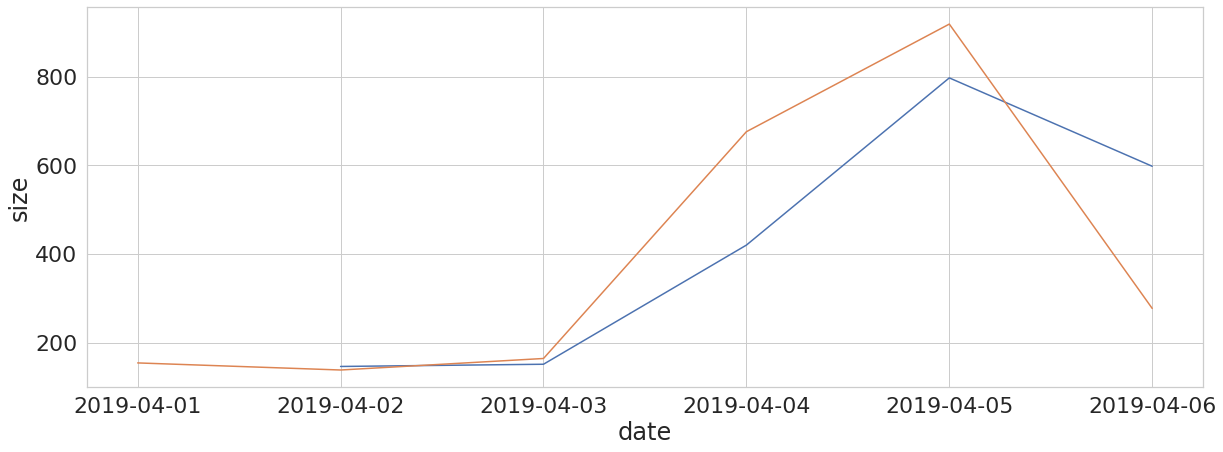

In [88]:
sns.lineplot(data = ads_data_mean_rolling_2, x = 'date', y = 'size')
sns.lineplot(data = ads_data_df_mean, x = 'date', y = 'size' )


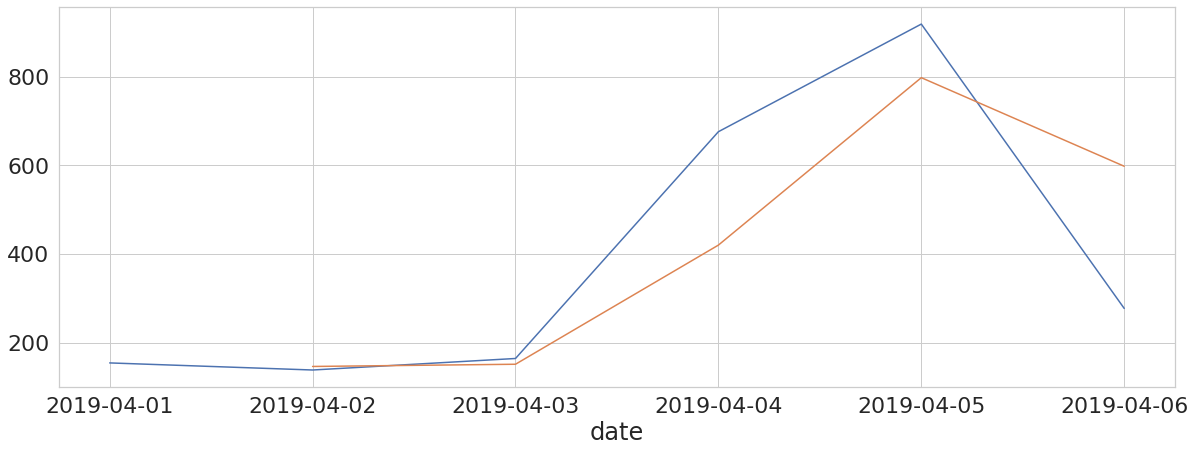

In [91]:
# Это не мое!! посмотрел у других - намного лучше
ads_data_mean = (ads_data_df
                     .query("event == 'view'")
                     .groupby(['date', 'ad_id'])
                     .size()
                     .groupby('date')
                     .mean()
                     .round()
                )
ads_data_mean
ads_data_rolling2_mean = (ads_data_df
                          .query("event == 'view'")
                          .groupby(['date', 'ad_id'])
                          .size()
                          .groupby('date')
                          .mean()
                          .rolling(2).mean()
                          .round()
                         )
ads_data_rolling2_mean
sns.lineplot(x=ads_data_mean.index, y=ads_data_mean.values)
sns.lineplot(x=ads_data_rolling2_mean.index, y=ads_data_rolling2_mean.values)

In [94]:
# считаем разницу
day_z = (ads_data_mean - ads_data_rolling2_mean).abs()


In [95]:
day_z

date
2019-04-01      NaN
2019-04-02      8.0
2019-04-03     13.0
2019-04-04    256.0
2019-04-05    121.0
2019-04-06    321.0
dtype: float64

In [96]:
(ads_data_mean - ads_data_rolling2_mean).abs().idxmax()

Timestamp('2019-04-06 00:00:00')

Объедините данные рекламы с данными о рекламных клиентах и 
найдите среднее количество дней от даты создания рекламного клиента (create_date) 
и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

- **Как делать это задание?**
    
    Сначала объедините датафрэйм с рекламой с датафрэймом с клиентами по колонке `client_union_id`.
    
    Затем переведите колонки со временем во временной тип, и вычтите из колонки date рекламного датафрэйма
    (дата рекламного события) дату регистрации клиента (`create_date`), задав это в колонку. 
    
    После этого сгруппируйте данные по клиенту и возьмите разницу, посчитанную в предыдущем предложении, 
    и соответствующую первому запуску рекламы. 
    
    Потом возьмите среднее
    
- **Какая-какая нужна** `date` **для подсчёта разницы?**
    
    Берите `date` из датафрэйма с рекламными событиями
    
- **Как посчитать разницу между временами?**
    
    Просто вычтите из одной колонке временного типа другую такую колонку. Это даст колонку типа `timedelta`
    
    Например,
    
    ```python
    df.time1 - df.time2
    ```
    
    Вернёт колонку с разницей между соответствующими ячейками колонки `time1` и `time2`
    
- **Какая разница времён соответствует самому первому запуску рекламы?**
    
    Чем первее запуск рекламы клиентом, тем ближе эта дата к дате регистрации клиента 
    (прошло меньше времени между его регистрацией и запуском первой рекламы, 
     чем между его регистрацией и запуском шестой рекламы). Поэтому нужно брать минимальную временную разницу

In [132]:
df_data_clients_data = pd.merge(ads_data_df, ads_clients_data_df, on = ['client_union_id'])

In [133]:
df_data_clients_data.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [134]:
df_data_clients_data['create_to_event'] = df_data_clients_data.date_x - df_data_clients_data.create_date

In [135]:
df_data_clients_data

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,create_to_event
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days


In [150]:
df_data_clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   date_x                 1000000 non-null  datetime64[ns] 
 1   time                   1000000 non-null  datetime64[ns] 
 2   event                  1000000 non-null  object         
 3   platform               1000000 non-null  object         
 4   ad_id                  1000000 non-null  int64          
 5   client_union_id        1000000 non-null  int64          
 6   campaign_union_id      1000000 non-null  int64          
 7   ad_cost_type           1000000 non-null  object         
 8   ad_cost                1000000 non-null  float64        
 9   has_video              1000000 non-null  int64          
 10  target_audience_count  1000000 non-null  int64          
 11  date_y                 1000000 non-null  datetime64[ns] 
 12  community_id   

In [179]:
df_data_clients_data.groupby('client_union_id').min()

,date_x,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,create_to_event
client_union_id,,,,,,,,,,,,,,
1,2019-04-01,2019-04-01 00:08:51,click,android,2,1,CPC,46.7,0,14841,2020-05-07,-130371893,2018-12-24,98 days
9,2019-04-03,2019-04-03 00:48:39,click,android,1902,1887,CPC,42.5,0,1970,2020-05-07,-130215524,2018-12-10,114 days
13,2019-04-02,2019-04-02 00:52:05,view,android,2064,2064,CPM,203.4,0,4145879,2020-05-07,-130623793,2019-01-26,66 days
16,2019-04-03,2019-04-03 02:01:56,click,android,2132,2073,CPC,47.5,0,672432,2020-05-07,-130748007,2018-12-19,105 days
20,2019-04-02,2019-04-02 00:06:06,click,android,2468,2464,CPM,191.5,0,84228,2020-05-07,-130189700,2019-03-01,32 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122004,2019-04-01,2019-04-01 00:12:11,click,android,122004,122004,CPM,192.0,0,10570,2020-05-07,-130906608,2019-01-24,67 days
122013,2019-04-04,2019-04-04 00:04:14,view,android,122013,122013,CPM,202.1,0,25294,2020-05-07,-130032486,2018-11-04,151 days
122023,2019-04-04,2019-04-04 00:18:24,view,android,122023,122023,CPM,204.3,0,424351,2020-05-07,-130823359,2018-11-29,126 days


In [141]:
df_data_clients_data.groupby('client_union_id').max()

,date_x,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,create_to_event
client_union_id,,,,,,,,,,,,,,
1,2019-04-02,2019-04-01 23:56:24,view,web,3,1,CPM,186.4,0,45035,2020-05-07,-130371893,2018-12-24,99 days
9,2019-04-04,2019-04-03 22:59:33,view,web,1902,1887,CPC,42.5,0,1970,2020-05-07,-130215524,2018-12-10,115 days
13,2019-04-03,2019-04-02 23:43:28,view,web,2064,2064,CPM,203.4,0,4145879,2020-05-07,-130623793,2019-01-26,67 days
16,2019-04-05,2019-04-04 23:02:03,view,web,2132,2073,CPC,47.5,0,672432,2020-05-07,-130748007,2018-12-19,107 days
20,2019-04-06,2019-04-05 23:50:29,view,web,2709,2464,CPM,193.4,0,6278654,2020-05-07,-130189700,2019-03-01,36 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122004,2019-04-02,2019-04-01 23:04:34,view,web,122004,122004,CPM,192.0,0,10570,2020-05-07,-130906608,2019-01-24,68 days
122013,2019-04-05,2019-04-04 23:55:59,view,web,122013,122013,CPM,202.1,0,25294,2020-05-07,-130032486,2018-11-04,152 days
122023,2019-04-05,2019-04-04 23:59:31,view,web,122023,122023,CPM,204.3,0,424351,2020-05-07,-130823359,2018-11-29,127 days


In [138]:
df_data_clients_data.groupby('client_union_id').min().mean()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


ad_id                                        56605.8
campaign_union_id                            56600.5
ad_cost                                      173.283
has_video                                  0.0238663
target_audience_count                         822949
community_id                            -1.30491e+08
create_to_event          124 days 09:04:43.532219570
dtype: object

In [139]:
df_data_clients_data.groupby('client_union_id').create_to_event.min().mean()

Timedelta('124 days 09:04:43.532219570')

In [142]:
df_data_clients_data.groupby('client_union_id').max().mean()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


ad_id                                        56612.9
campaign_union_id                              56602
ad_cost                                      176.333
has_video                                  0.0238663
target_audience_count                    1.22284e+06
community_id                            -1.30491e+08
create_to_event          125 days 13:49:58.568019094
dtype: object

In [ ]:
💀 Сложное задание! 💀

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. 
Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна

1000
50
​
 ∗100=5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени 
до создания первой рекламы с pd.Timedelta(365, unit='day'))

Ответ дайте в процентах и округлите до сотых. Пример ответа:

34.69


NB! У нас могут быть люди, которые не сделали рекламу вообще. Не забудьте их учесть :)

- **Как решать это задание?**
    
    Для начала отберите клиентов, у которых запуск первой рекламы произошёл не позже чем через год после регистрации. 
    
    Затем посчитайте их число и разделите на число всех клиентов, переведите в проценты и округлите до 2-ого знака.
    
    **Внимание:** может показаться, что все клиенты сделали рекламу раньше, чем за год. Но не забывайте про возможность того, 
        что кто-то сделал кабинет, но так и не сделал рекламу...
    
- **Как отобрать нужных клиентов?**
    
    Переиспользуйте результат из прошлого задания - из данных с промежутком от регистрации до создания рекламы отфильтруйте строки,
    где промежуток был больше 365. 
    Если таких нет - отфильтруйте тех, у кого вообще нет этого значения.
    
- **Как оставить строки с промежутком меньше года?**
    
    Нужно сравнить значения в датафрэйме с `timedelta` в 1 год, чтобы её получить воспользуйтесь `pd.Timedelta`
    
    Например,
    
    ```python
    pd.Timedelta(287, unit='day')
    ```
    
    Создаст промежуток в 287 дней
    
- **Мой ответ не подходит**
    
    А вы сначала перевели в проценты, а затем округлили до сотых? Или сначала округлили до сотых, а потом перевели в проценты?
    Если второй вариант, то переделайте по-первому варианту и сравните результаты от обоих

In [144]:
# Сколько уникальных айдишников в ads_clients_data?
all_clients_number = ads_clients_data_df.client_union_id.nunique()
all_clients_number

122078

In [180]:
# Сколько униальных айдишников среди тех, кто опубликовал первое объялвение в первый год?
timedelta = pd.Timedelta(365, unit='day')

# clients_conversion_time = ads_and_client_data.groupby('client_union_id').create_to_event.min()
# converted_clients_number = clients_conversion_time[clients_conversion_time <= timedelta].shape[0]
# converted_clients_number

In [181]:
count_df_client_union_id =  df_data_clients_data.query('create_to_event <= @timedelta').client_union_id.nunique()
count_df_client_union_id

838

In [169]:
round(((count_df_client_union_id/ all_clients_number) * 100), 2)

0.69

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования 
(от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. 
Создать временные промежутки можно с помощью pd.to_timedelta().

Могут пригодиться:
pd.cut()
value_counts()


- **Как решать это задание?**
    
    Возьмите промежутки от регистрации до создания первой рекламы и разбейте их на интервалы с помощью функции `pd.cut`,
    используя указанные в задании интервалы. Затем посчитайте число клиентов, попадающих в каждый такой интервал
    
- **Получение границ интервалов**
    
    Так как значения в колонке, к которой применяется `pd.cut`, `timedelta`, 
    то и границы интервалов тоже должны быть `timedelta`. Чтобы получить `timedelta` 
    в bins используйте функцию `pd.to_timedelta` и примените её на списке нужных значений
    
    Например,
    
    ```python
    pd.to_timedelta(['1d', '2d'])
    ```
    
- **Количество границ интервалов**
    
    Чтобы получить n интервалов, нужна n + 1 граница
    
    То есть граница интервал граница интервал граница 
    
    или в символическом виде
    
    | 0 | 0 |
    
    где вертикальная черта - граница, а нолик - интервал

In [187]:
time_cuts = pd.to_timedelta(['0d', '30d', '90d', '180d', '365d', '3650d'])
time_cuts

TimedeltaIndex(['0 days', '30 days', '90 days', '180 days', '365 days',
                '3650 days'],
               dtype='timedelta64[ns]', freq=None)

In [259]:
all_converted_clients = df_data_clients_data.groupby('client_union_id', as_index=False).create_to_event.min()
all_converted_clients.head()

,client_union_id,create_to_event
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days


In [262]:
all_converted_clients['conversion_cut']= pd.cut(all_converted_clients.create_to_event,
                                 time_cuts, labels=["до 30 дней",
                                                    "от 30 до 90 дней",
                                                    "от 90 до 180 дней",
                                                    "от 180 дней до 1 года",
                                                   "Больше года/вечность"])
all_converted_clients.head()

,client_union_id,create_to_event,conversion_cut
0,1,98 days,от 90 до 180 дней
1,9,114 days,от 90 до 180 дней
2,13,66 days,от 30 до 90 дней
3,16,105 days,от 90 до 180 дней
4,20,32 days,от 30 до 90 дней


In [263]:
data = all_converted_clients.conversion_cut.value_counts()
data


от 90 до 180 дней        396
от 30 до 90 дней         263
от 180 дней до 1 года    168
до 30 дней                11
Больше года/вечность       0
Name: conversion_cut, dtype: int64

In [189]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#  Это я не отсортировал и сделал периоды


df_data_clients_data['conversion_cut'] = pd.cut(df_data_clients_data.create_to_event,
                                 time_cuts, labels=["до 30 дней",
                                                    "от 30 до 90 дней",
                                                    "от 90 до 180 дней",
                                                    "от 180 дней до 1 года",
                                                   "Больше года/вечность"])
df_data_clients_data.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,create_to_event,conversion_cut
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,от 90 до 180 дней
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,от 90 до 180 дней
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,от 90 до 180 дней
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,от 90 до 180 дней
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,от 90 до 180 дней


In [251]:
df_data_clients_data.query('conversion_cut == "до 30 дней"').groupby('client_union_id').create_to_event.min().shape

(11,)

И последнее задание: постройте интерактивный барплот,
на котором будут показаны категории с количеством уникальных клиентов в них 
(то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). 
Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.


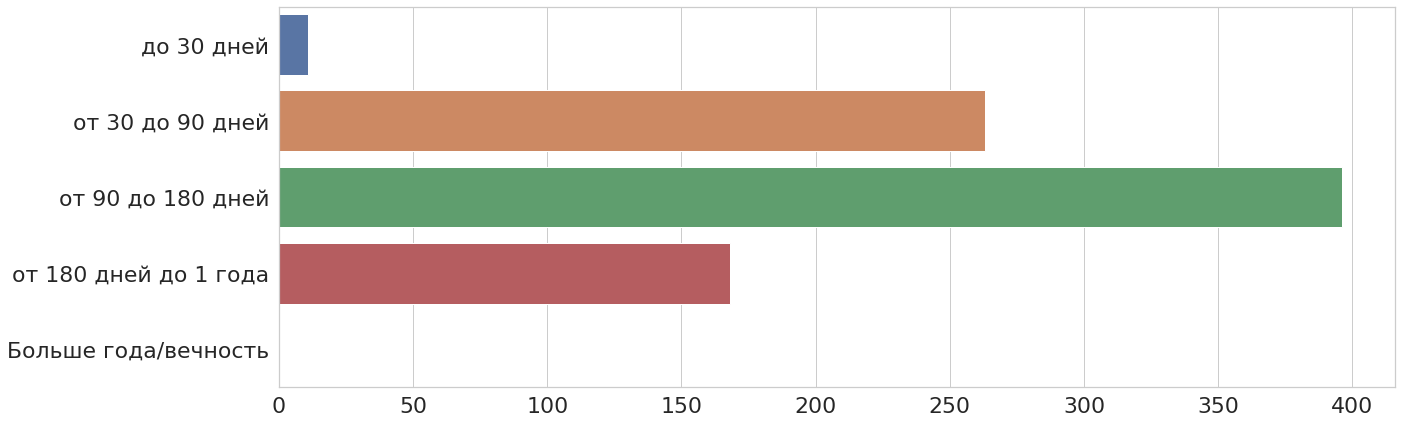

In [264]:
sns.barplot(x=data.values, y=data.index)